<a href="https://colab.research.google.com/github/jcdevaney/pyAMPACT/blob/master/pyAMPACT_and_crim_intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='text-align: center;'>Combining pyAMPACT & Humdrum</h1>
<h2 style='text-align: center;'>How to use pyAMPACT together with Humdrum analysis tools</h2>

This notebook demonstrates how to use pyAMPACT with Humdrum. By "Humdrum" we are referring to the whole Humdrum ecosystem of analysis tools including humlib and the Verovio Humdrum Viewer. On its own, pyAMPACT already supports .krn as a symbolic notation file type for both importing and exporting/converting files. So this notebook goes beyond that and explains how to integrate Humdrum analysis tools into a pyAMPACT workflow.

As a practical example, we get Renaissance dissonance analysis from the humlib dissonant tool. We then use pyAMPACT see which of the dissonance types correlate with various observed audio phenomena in a recording of the same piece. Since the two main components of this workflow are distributed in the Humdrum and pyAMPACT toolkits, the only way to realize this workflow is by combining these otherwise separate tools.

Now let's get the score and analysis data. The critical thing here is that **the Humdrum analysis must be in the same .krn file as the score itself**. So in addition to having as many **kern spines as there are voices in the piece, the krn file should have at least one spine of analysis data. As a reference, there are several special spine types that we have dedicated methods for reading in as pandas dataframes in pyAMPACT. This table shows which pyAMPACT Score object methods to use to get each given .krn file spine type:

| Spine Type | pyAMPACT Methods |
|----------|----------|
| **kern | .notes(), .midiPitches() |
| **text | .lyrics() |
| **dyanm | .dynamics() |
| **harm | .harm(), .harmKeys(), .romanNumeral()|
| **function | .functions() |
| **chord | .chords() |
| **cdata | .cdata() |
| Any other spine type | .getSpines('name_of_spine_type') |

In this notebook we're using .getSpines() to get `**cdata-rdiss` spine data into a score-time aligned pandas dataframe. We're using .getSpines because it's the generic spine importer pyAMPACT exposes for any spine types not explicitly listed in the table above.

Humdrum's Renaissance dissonance classification tool is part of humlib and is also accessible on the Verovio Humdrum Viewer. You can go to any Renaissance score, then type "dissonant" in the text box and hit return. Then press the `+` button to the right of the text box to compile the filter which will put the analysis labels in their own spines in the .krn file. This is what that looks like for Obrecht's [Kyrie, Missa Ave regina celorum](https://verovio.humdrum.org/?file=jrp/Obr/Obr1002a-Missa_Ave_regina_celorum-Kyrie.krn).

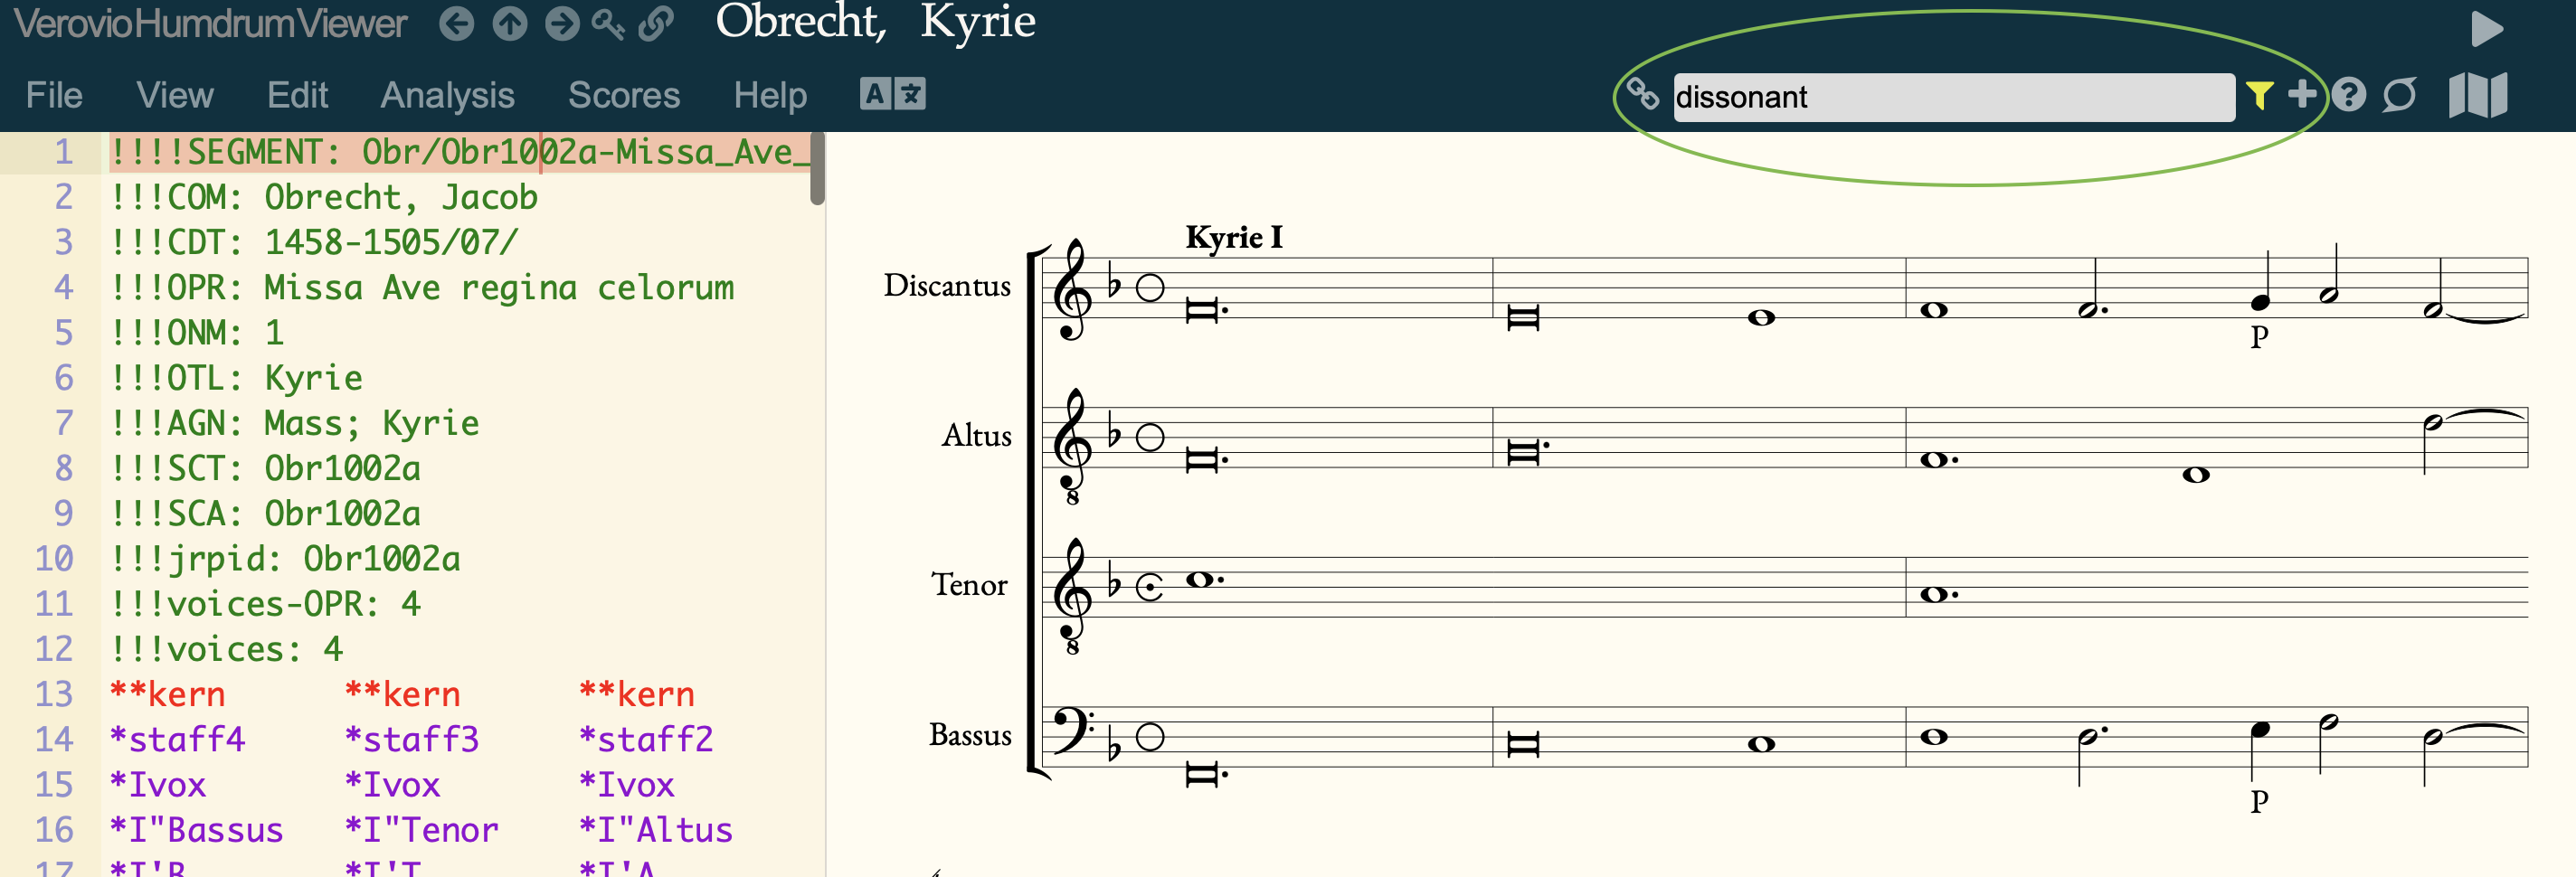

Alternatively you can add `!!!filter: dissonant` to the top of the .krn file on the left side of the score and then press`alt + c` to compile the filter (`option + c` on a mac). Then you can copy the full text and save it as your .krn file. Still another option is to use Humdrum from the terminal to create your score with analysis.

Now that we have this file saved somewhere, let's import it with pyAMPACT. Notice how the `**cdata-rdiss` spines are detected on import and you get prompted with this message "Detected and imported these spine types: **cdata-rdiss"

In [ ]:
%cd /content/
from IPython.utils import io
print('Importing libraries...')
with io.capture_output() as captured:
    !pip install --upgrade pandas
    !pip install -i https://test.pypi.org/simple/ --no-deps pyampact==0.3.1
    import pyampact

piece = pyampact.Score('https://github.com/jcdevaney/pyAMPACT/blob/master/test_files/O_virgo_miserere_mei.krn')

That message lets you know which spine types you can request from .getSpines(). So now lets look at the dissonance analysis as a pandas dataframe:

In [1]:
rdiss = piece.getSpines('cdata-rdiss')
rdiss

NameError: name 'piece' is not defined

Great! Now let's import an audio recording of this piece to get partwise audio analysis.